# The goal of this project is to understand the properties of products and outlets which play a key role in increasing sales.

In [1]:
# first we import  libraries that will aid us 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import mode
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay

ImportError: cannot import name 'ConfusionMatrixDisplay' from 'sklearn.metrics' (C:\Users\samad ADL\Anaconda3\lib\site-packages\sklearn\metrics\__init__.py)

In [ ]:
# loading our data sets

In [3]:
test = pd.read_csv('Test-Set.csv')
train = pd.read_csv('Train-Set.csv')

In [4]:
test.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
train.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
test.info()   


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
ProductID            5681 non-null object
Weight               4705 non-null float64
FatContent           5681 non-null object
ProductVisibility    5681 non-null float64
ProductType          5681 non-null object
MRP                  5681 non-null float64
OutletID             5681 non-null object
EstablishmentYear    5681 non-null int64
OutletSize           4075 non-null object
LocationType         5681 non-null object
OutletType           5681 non-null object
dtypes: float64(3), int64(1), object(7)
memory usage: 332.9+ KB


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
ProductID            8523 non-null object
Weight               7060 non-null float64
FatContent           8523 non-null object
ProductVisibility    8523 non-null float64
ProductType          8523 non-null object
MRP                  8523 non-null float64
OutletID             8523 non-null object
EstablishmentYear    8523 non-null int64
OutletSize           6113 non-null object
LocationType         8523 non-null object
OutletType           8523 non-null object
OutletSales          8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 566.0+ KB


# wE THEN PROCEED TO VHECK FOR MISSING VALUES IN THE TEST AND TRAIN SET

# CHECKING FOR MISSING VALUES IN THE TEST DATA SET

In [8]:
print(test.isnull().sum())

ProductID               0
Weight                976
FatContent              0
ProductVisibility       0
ProductType             0
MRP                     0
OutletID                0
EstablishmentYear       0
OutletSize           1606
LocationType            0
OutletType              0
dtype: int64


# WE CAN CONFIRM THE WEIGHT COLUMN(NUERICAL) AND THE OUTLETSIZE COLUMN (CATEGORICAL) HAVE MISSING VALUES

# SOLVING THE MISSING VALUES IN THE TEST SET

In [9]:
# Handling missing values in the 'OutletSize' column based on mode grouped by 'OutletType'


# Calculate the mode of OutletSize for each OutletType
mode_of_outlet_size = test.groupby('OutletType')['OutletSize'].agg(lambda x: x.value_counts().index[0])
# print(mode_of_outlet_size)

# Fill missing values in 'OutletSize' based on 'OutletType' using the calculated mode
test.loc[test['OutletSize'].isnull(), 'OutletSize'] = test.loc[test['OutletSize'].isnull(), 'OutletType'].apply(lambda x: mode_of_outlet_size[x])


In [10]:
print(test.isnull().sum())

ProductID              0
Weight               976
FatContent             0
ProductVisibility      0
ProductType            0
MRP                    0
OutletID               0
EstablishmentYear      0
OutletSize             0
LocationType           0
OutletType             0
dtype: int64


# seeing that the missing values of OutletSize has been solved we then proceed to solve the missing values in weight

In [11]:
test['Weight'].fillna(test['Weight'].mean(), inplace=True)

In [12]:
print(test.isnull().sum())

ProductID            0
Weight               0
FatContent           0
ProductVisibility    0
ProductType          0
MRP                  0
OutletID             0
EstablishmentYear    0
OutletSize           0
LocationType         0
OutletType           0
dtype: int64


# seeing that there are no more missing values in the test set we then proceed to check and solve the missing values in the train set

In [13]:
print(train.isnull().sum())

ProductID               0
Weight               1463
FatContent              0
ProductVisibility       0
ProductType             0
MRP                     0
OutletID                0
EstablishmentYear       0
OutletSize           2410
LocationType            0
OutletType              0
OutletSales             0
dtype: int64


# solving the missing values in weight and outlet size columns

In [14]:
train['Weight'].fillna(train['Weight'].mean(), inplace=True)

In [15]:
print(train.isnull().sum())

ProductID               0
Weight                  0
FatContent              0
ProductVisibility       0
ProductType             0
MRP                     0
OutletID                0
EstablishmentYear       0
OutletSize           2410
LocationType            0
OutletType              0
OutletSales             0
dtype: int64


In [16]:
# Handling missing values in the 'OutletSize' column based on mode grouped by 'OutletType'


# Calculate the mode of OutletSize for each OutletType in the train dataset
mode_of_trainoutlet_size = train.groupby('OutletType')['OutletSize'].agg(lambda x: x.value_counts().index[0])

# print(mode_of_outlet_size)

# Fill missing values in 'OutletSize' in the train dataset based on 'OutletType' using the calculated mode
train.loc[train['OutletSize'].isnull(), 'OutletSize'] = train.loc[train['OutletSize'].isnull(), 'OutletType'].apply(lambda x: mode_of_trainoutlet_size[x])

In [17]:
print(train.isnull().sum())

ProductID            0
Weight               0
FatContent           0
ProductVisibility    0
ProductType          0
MRP                  0
OutletID             0
EstablishmentYear    0
OutletSize           0
LocationType         0
OutletType           0
OutletSales          0
dtype: int64


# we can onfirm that there are no more missing values in the train set

# Checking for Outliers in the train and test set using z score

In [18]:
numericaltestcolumns = test.select_dtypes(include=[np.number]).columns

z_scores = np.abs(stats.zscore(test[numericaltestcolumns]))

print(np.where(z_scores > 3))

(array([  46,   76,   78,   89,  138,  333,  385,  474,  543,  637,  858,
        871, 1046, 1191, 1256, 1270, 1411, 1516, 1547, 1577, 1616, 1710,
       1812, 1823, 1857, 1915, 1919, 2019, 2179, 2230, 2365, 2380, 2393,
       2504, 2516, 2561, 2605, 2609, 2625, 2628, 2677, 2779, 2836, 2843,
       3267, 3294, 3313, 3316, 3346, 3378, 3502, 3638, 3679, 3970, 4052,
       4147, 4159, 4208, 4255, 4328, 4365, 4421, 4575, 4616, 4689, 4801,
       4804, 4846, 4919, 4976, 4999, 5121, 5157, 5277, 5290, 5435, 5469,
       5482, 5514, 5571, 5668], dtype=int32), array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32))


# soliving outliers BY CAPPING AND FLOORING

In [19]:
numericaltestcolumns = test.select_dtypes(include=[np.number]).columns

# Calculate mean and standard deviation for numeric columns
mean_values = test[numericaltestcolumns].mean()
std_dev = test[numericaltestcolumns].std()

# Define bounds using a standard deviation multiplier
std_dev_multiplier = 3
lower_bound = mean_values - (std_dev_multiplier * std_dev)
upper_bound = mean_values + (std_dev_multiplier * std_dev)

# Apply capping and flooring using the defined bounds
test[numericaltestcolumns] = test[numericaltestcolumns].apply(lambda x: np.clip(x, lower_bound[x.name], upper_bound[x.name]))
    


In [20]:
# Print the DataFrame after handling outliers
print(test)

     ProductID     Weight FatContent  ProductVisibility  \
0        FDW58  20.750000    Low Fat           0.007565   
1        FDW14   8.300000        reg           0.038428   
2        NCN55  14.600000    Low Fat           0.099575   
3        FDQ58   7.315000    Low Fat           0.015388   
4        FDY38  12.695633    Regular           0.118599   
5        FDH56   9.800000    Regular           0.063817   
6        FDL48  19.350000    Regular           0.082602   
7        FDC48  12.695633    Low Fat           0.015782   
8        FDN33   6.305000    Regular           0.123365   
9        FDA36   5.985000    Low Fat           0.005698   
10       FDT44  16.600000    Low Fat           0.103569   
11       FDQ56   6.590000    Low Fat           0.105811   
12       NCC54  12.695633    Low Fat           0.171079   
13       FDU11   4.785000    Low Fat           0.092738   
14       DRL59  16.750000         LF           0.021206   
15       FDM24   6.135000    Regular           0.079451 

In [21]:
 z_threshold = 3
# # Check for outliers after adjustment
z_scores_after = np.abs(stats.zscore(test[numericaltestcolumns]))
 outliers_after = (z_scores_after > z_threshold)
 print (outliers_after)

[[False False False False]
 [False False False False]
 [False False False False]
 ...
 [False False False False]
 [False False False False]
 [False False False False]]


# SINCE THERE ARE NO COLUMNS WITH A Z SCORE HIGHER THAN 3 AFTER CAPPING AND FLOORING, WE CAN ASSUME WE HAVE HANDLED THE OUTLIERS


AttributeError: module 'seaborn' has no attribute 'histplot'

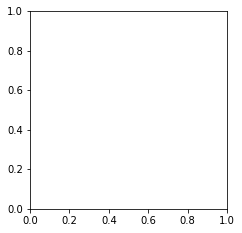

In [22]:
plt.figure(figsize=(12, 8))
for i, column in enumerate(numericaltestcolumns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(test[column], kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()

In [23]:
# CHECKING AND SOLVING OUTLIERS IN THE TRAIN DATA SET

In [24]:
numericaltraincolumns = train.select_dtypes(include=[np.number]).columns

# Calculate Z-scores for the numerical columns
z_scores = np.abs(stats.zscore(train[numericaltraincolumns]))

print(np.where(z_scores > 3))

(array([  49,   83,  108,  130,  145,  174,  276,  304,  333,  373,  434,
        456,  472,  502,  521,  532,  661,  694,  753,  809,  854,  935,
        991,  997, 1009, 1138, 1159, 1254, 1272, 1291, 1311, 1324, 1434,
       1450, 1496, 1501, 1506, 1560, 1575, 1644, 1651, 1805, 1827, 1841,
       1859, 1998, 2088, 2109, 2122, 2216, 2238, 2251, 2293, 2324, 2439,
       2445, 2516, 2535, 2586, 2613, 2728, 2776, 2855, 2895, 3017, 3083,
       3087, 3098, 3154, 3206, 3234, 3286, 3399, 3407, 3458, 3474, 3488,
       3497, 3540, 3667, 3709, 3720, 3750, 3757, 3767, 3884, 3993, 4006,
       4219, 4289, 4346, 4349, 4382, 4408, 4530, 4656, 4674, 4676, 4681,
       4772, 4789, 4888, 4941, 4961, 4991, 5031, 5065, 5150, 5177, 5185,
       5223, 5287, 5315, 5374, 5500, 5550, 5619, 5732, 5734, 5752, 5795,
       5799, 5812, 5837, 5880, 5891, 5946, 5977, 6000, 6008, 6012, 6134,
       6179, 6334, 6409, 6536, 6537, 6541, 6576, 6606, 6622, 6674, 6786,
       6886, 6903, 6993, 7005, 7016, 7076, 7088, 7

In [25]:
# Calculate mean and standard deviation for numeric columns
mean_values = train[numericaltraincolumns].mean()
std_dev = train[numericaltraincolumns].std()

# Define bounds using a standard deviation multiplier
std_dev_multiplier = 3
lower_bound = mean_values - (std_dev_multiplier * std_dev)
upper_bound = mean_values + (std_dev_multiplier * std_dev)

# Apply capping and flooring using the defined bounds
train[numericaltraincolumns] = train[numericaltraincolumns].apply(lambda x: np.clip(x, lower_bound[x.name], upper_bound[x.name]))


In [26]:
# Check for outliers after adjustment
z_threshold = 3
z_scores_after = np.abs(stats.zscore(train[numericaltraincolumns]))
trainoutliers_after = (z_scores_after > z_threshold)
print(outliers_after)

[[False False False False]
 [False False False False]
 [False False False False]
 ...
 [False False False False]
 [False False False False]
 [False False False False]]


# seeing that there is no column with zscores greater than 3 after our adjustment we can assume we've handled the outliers

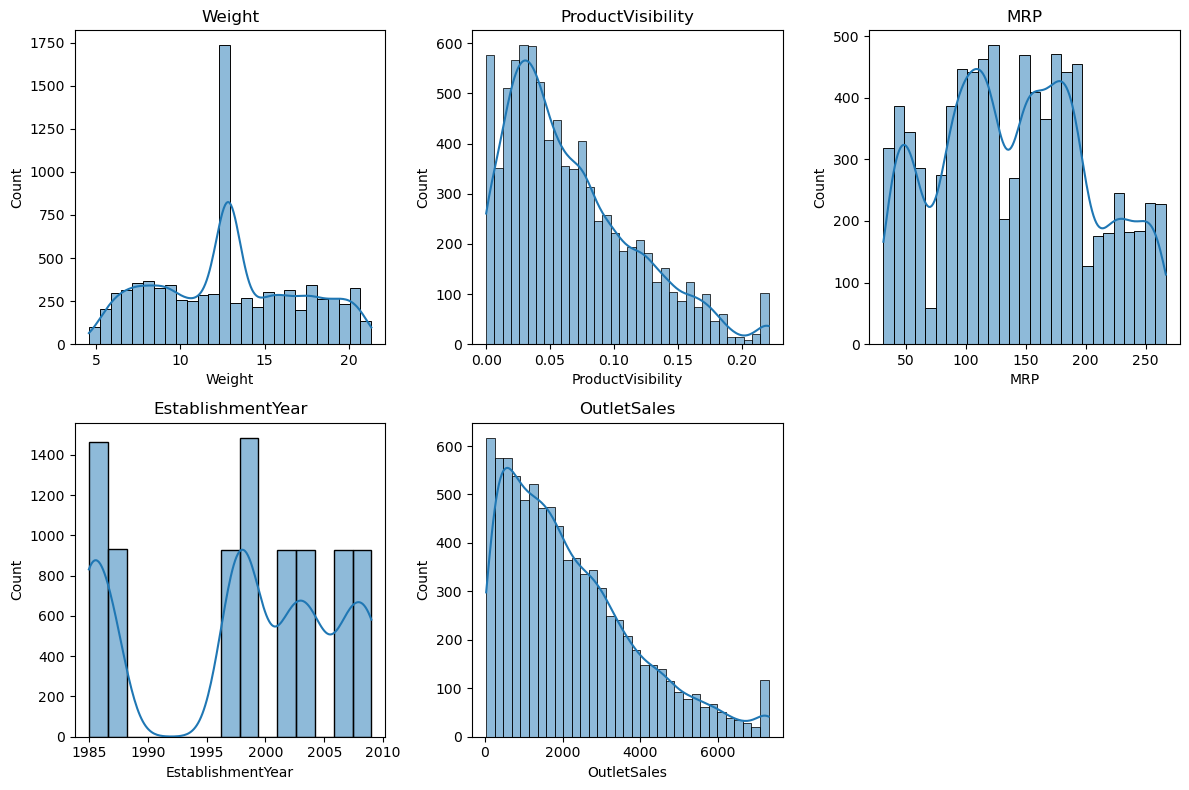

In [265]:
plt.figure(figsize=(12, 8))
for i, column in enumerate(numericaltraincolumns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(train[column], kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()

# we will be proceeding with the train set for training our model from here on out.

# checking and handling skewness

In [27]:
skewness = train[numericaltraincolumns].apply(lambda x: stats.skew(x.dropna()))
skewed_columns = skewness[skewness > 0.75].index

# Apply log transformation to skewed columns
train[skewed_columns] = train[skewed_columns].apply(lambda x: np.log1p(x))

# Verify skewness reduction
print(train[skewed_columns].apply(lambda x: stats.skew(x.dropna())))

ProductVisibility    0.817401
OutletSales         -0.896933
dtype: float64


# we can see that product visibility is positively skewed and outletsales is negatively skewed so we're going to try to reduce the skewness to improve our models performance

In [28]:
skewness = train[['ProductVisibility', 'OutletSales']].apply(lambda x: stats.skew(x.dropna()))

# Identify columns with skewness greater than 0.75 (adjust threshold as needed)
skewed_columns = skewness[skewness > 0.75].index

# Apply log transformation to skewed columns
train[skewed_columns] = train[skewed_columns].apply(lambda x: np.log1p(x))

# Verify skewness reduction
print(train[skewed_columns].apply(lambda x: stats.skew(x.dropna())))

ProductVisibility    0.730217
dtype: float64


# product visibility now has a skewness of o.73  which isnt greater than 0.75

# WE THEN LABEL ENCODE UR CATEGORICAL COLUMNS SO WE CAN VISUALIZE CORRELATION

In [29]:
# checking and converting the values in fat content
train['FatContent'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: FatContent, dtype: int64

In [30]:
train.replace({'FatContent': {'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)
train['FatContent'].value_counts()

Low Fat    5517
Regular    3006
Name: FatContent, dtype: int64

# dropping columns with unique values that wont aid our analysis 

In [31]:
train.drop(['ProductID', 'OutletID'], axis=1, inplace=True)

In [32]:
train.head()

,Weight,FatContent,ProductVisibility,ProductType,MRP,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,9.30,Low Fat,0.015795,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,8.225808
1,5.92,Regular,0.018915,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,6.096776
2,17.50,Low Fat,0.016485,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,7.648868
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Small,Tier 3,Grocery Store,6.597664
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,6.903451


In [33]:
# Initialize LabelEncoder
encoder = LabelEncoder()
# Encode categorical variables
train['FatContent'] = encoder.fit_transform(train['FatContent'])
train['ProductType'] = encoder.fit_transform(train['ProductType'])
train['OutletSize'] = encoder.fit_transform(train['OutletSize'])
train['LocationType'] = encoder.fit_transform(train['LocationType'])
train['OutletType'] = encoder.fit_transform(train['OutletType'])


In [34]:
train.head()

,Weight,FatContent,ProductVisibility,ProductType,MRP,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,9.30,0,0.015795,4,249.8092,1999,1,0,1,8.225808
1,5.92,1,0.018915,14,48.2692,2009,1,2,2,6.096776
2,17.50,0,0.016485,10,141.6180,1999,1,0,1,7.648868
3,19.20,1,0.000000,6,182.0950,1998,2,2,0,6.597664
4,8.93,0,0.000000,9,53.8614,1987,0,2,1,6.903451


# plotting the correlation matrix

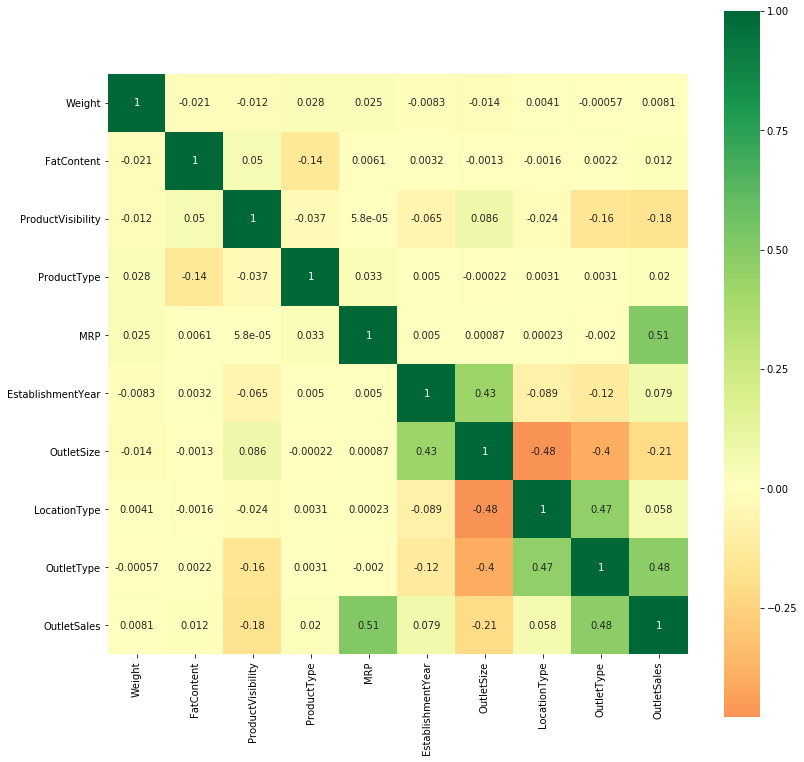

In [35]:
correlation_matrix = train.corr()

plt.figure(figsize = (13, 13))
# Plot the correlation matrix as a heatmap
sns.heatmap(train.corr(), annot=True, cmap='RdYlGn', center=0, square=True)

# a correlation of 0.51 between MRP and Outlet Sales . this suggests that the maximum retail price influences the outlet sales.

# outletsales and outlet type have a correlation 0f 0.48, This correlation suggests that the type of outlet influences the sales performance of the outlets.

# splitting the train data set

In [36]:
x = train.drop(columns = 'OutletSales',axis = 1)
y = train["OutletSales"]


In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)
print(x.shape, x_train.shape, x_test.shape)

# Initialize the Random Forest model
model_rf = RandomForestRegressor(n_estimators=500, max_features='sqrt', random_state=2)

#n_estimators was set to 500 in order to account for underfitting


# Train the model
model_rf.fit(x_train, y_train)

# Predicting on the test set
y_pred = model_rf.predict(x_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")


(8523, 9) (6818, 9) (1705, 9)
RMSE: 0.28772076444002875
R-squared: 0.7152072365031887


# The RMSE value of 0.287 means that, on average, the model's predictions are about ±0.54 units away from the actual values of outlet sales.

# Based on these metrics, the Random Forest model appears to be performing reasonably well. 

# WE go back to the Test data set so we can make predictions  based on the trained model.

# checking and handling skewness in test data set

In [40]:
print(test.isnull().sum())

ProductID            0
Weight               0
FatContent           0
ProductVisibility    0
ProductType          0
MRP                  0
OutletID             0
EstablishmentYear    0
OutletSize           0
LocationType         0
OutletType           0
dtype: int64


In [41]:
skewness = test[numericaltestcolumns].apply(lambda x: stats.skew(x.dropna()))
testskewed_columns = skewness[skewness > 0.75].index

# Apply log transformation to skewed columns
test[testskewed_columns] = test[testskewed_columns].apply(lambda x: np.log1p(x))

# Verify skewness reduction
print(test[testskewed_columns].apply(lambda x: stats.skew(x.dropna())))

ProductVisibility    0.847858
dtype: float64


# product visibility has a skewness of 0.76 which means it is positively skewed so we reduce the skewness

In [42]:
skewness = test[['ProductVisibility']].apply(lambda x: stats.skew(x.dropna()))

# Identify columns with skewness greater than 0.75 (adjust threshold as needed)
testskewed_columns = skewness[skewness > 0.75].index
# Apply log transformation to skewed columns
test[testskewed_columns] = test[testskewed_columns].apply(lambda x: np.log1p(x))

# Verify skewness reduction
print(test[testskewed_columns].apply(lambda x: stats.skew(x.dropna())))

ProductVisibility    0.755115
dtype: float64


# We have reduced the skewness of product visibility to 0.67.

# Encoding test categorical columns

In [43]:
# checking and converting the values in fat content
test['FatContent'].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: FatContent, dtype: int64

In [44]:
test.replace({'FatContent': {'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)
test['FatContent'].value_counts()

Low Fat    3668
Regular    2013
Name: FatContent, dtype: int64

In [45]:
test.drop(['ProductID', 'OutletID'], axis=1, inplace=True)

# using label encoder to encode categorical columns

In [46]:
encoder = LabelEncoder()
test['FatContent'] = encoder.fit_transform(test['FatContent'])
test['ProductType'] = encoder.fit_transform(test['ProductType'])
test['OutletSize'] = encoder.fit_transform(test['OutletSize'])
test['LocationType'] = encoder.fit_transform(test['LocationType'])
test['OutletType'] = encoder.fit_transform(test['OutletType'])

In [47]:
test.head()

,Weight,FatContent,ProductVisibility,ProductType,MRP,EstablishmentYear,OutletSize,LocationType,OutletType
0,20.750000,0,0.007508,13,107.8622,1999,1,0,1
1,8.300000,1,0.037014,4,87.3198,2007,2,1,1
2,14.600000,0,0.090685,11,241.7538,1998,2,2,0
3,7.315000,0,0.015156,13,155.0340,2007,2,1,1
4,12.695633,1,0.106230,4,234.2300,1985,1,2,3


# test data prediction

In [48]:

# Predicting on test data
test_predictions = model_rf.predict(test)

# Displaying  predictions
print(test_predictions)

[7.34680726 7.21036356 6.25404224 ... 7.47070234 8.4358342  7.25781835]


In [49]:
# Predicting on test data
test_predictions = model_rf.predict(test)

# Creating a DataFrame with predicted OutletSales
df = pd.DataFrame(test_predictions, columns=['OutletSales'])

# Adding predicted OutletSales to test dataset
test['OutletSales'] = test_predictions


In [50]:
test.head()

,Weight,FatContent,ProductVisibility,ProductType,MRP,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,20.750000,0,0.007508,13,107.8622,1999,1,0,1,7.346807
1,8.300000,1,0.037014,4,87.3198,2007,2,1,1,7.210364
2,14.600000,0,0.090685,11,241.7538,1998,2,2,0,6.254042
3,7.315000,0,0.015156,13,155.0340,2007,2,1,1,7.459413
4,12.695633,1,0.106230,4,234.2300,1985,1,2,3,8.438649


# saving the test as anew csv file

In [51]:
test.to_csv("testpredictions.csv")